## Web Scraping pada Website kalibrr.id Menggunakan Python

Web scraping (atau juga disebut sebagai web data mining atau web harvesting) adalah teknik pengambilan data dari halaman web secara otomatis dengan menggunakan perangkat lunak tertentu. Teknik ini digunakan untuk mengekstrak informasi dari berbagai situs web, termasuk teks, gambar, audio, video, dan informasi lainnya yang dapat diakses melalui jaringan internet.

Web scraping dapat dilakukan dengan menggunakan berbagai teknologi dan metode, seperti crawling, parsing, scraping, dan ekstraksi data. Tujuan dari web scraping adalah untuk mengumpulkan data dari berbagai sumber yang berbeda dan menggunakannya untuk berbagai tujuan, seperti penelitian pasar, analisis data, pengumpulan berita, dan sebagainya.

Namun, perlu diingat bahwa beberapa situs web mungkin melarang atau menghambat penggunaan teknik web scraping pada halaman web mereka, sehingga penggunaan teknik ini harus dilakukan dengan hati-hati dan dengan memperhatikan hak cipta dan privasi.


www.kalibrr.id adalah situs web yang menyediakan platform untuk pencarian pekerjaan dan rekrutmen di Indonesia. Situs ini memungkinkan perusahaan untuk memposting lowongan pekerjaan mereka dan mencari kandidat yang cocok untuk posisi tersebut, serta memungkinkan pencari kerja untuk mencari lowongan pekerjaan yang sesuai dengan kualifikasi dan minat mereka.

<img src="asset/kalibrr_id.png">

Sebelum memulai scraping web menggunakan python ada beberapa hal yang perlu disiapkan. Pertama, kita harus menginstall library yang diperlukan untuk scraping web yaitu "request" ,"bs4" dan "pandas. Pada library "bs4" kita akan menggunakan sebuah fungsi yang bernama BeautifulSoup yang berguna untuk proses pengambilan data pada website. Pastikan anda install libary sebagai berikut :


1. "Requests" digunakan untuk mengirim permintaan HTTP ke server dan mendapatkan respon
2. "BeautifulSoup" digunakan untuk melakukan parsing atau ekstraksi data dari HTML dan XML
3. "Pandas" digunakan untuk membantu mengelola data yang telah di scrape dan melakukan analisis data
4. "Flask"
5. "Matplotlib"


## Setting Virtual Environment , Kernel and Requirement Dependencies

Environment dan Kernel pada Jupyter Notebook berfungsi untuk memastikan bahwa dependensi dan pustaka yang digunakan pada proyek atau aplikasi tertentu terisolasi dan tidak mempengaruhi proyek atau aplikasi lain. Kernel, sebagai bagian inti dari sistem, bertanggung jawab untuk mengeksekusi kode dalam bahasa pemrograman tertentu dan dapat diganti sesuai kebutuhan.

a. Untuk Membuat Virtual Environment dan kernel, buka Anaconda Prompt dengan perintah sebagai berikut :

- conda create -n <ENV_NAME> python=3.10
- conda activate <ENV_NAME>

- conda install ipykernel
- python -m ipykernel install --user --name <ENV_NAME>

b. Requirement Dependencies, atau dependensi kebutuhan, adalah daftar pustaka, modul, atau perangkat lunak lainnya yang diperlukan oleh suatu program atau aplikasi untuk berjalan dengan benar. Dalam pengembangan perangkat lunak, daftar dependensi biasanya didefinisikan dalam sebuah file yang disebut "requirements file". Seluruh dependecies telah di-export ke dalam file requirements.txt. Oleh karena itu untuk melakukan install packages anda hanya perlu melakukan install pakage sebagai berikut :

- pip install -r requirements.txt --user

untuk memastikan seluruh dependecies sudah ter-install, kita bisa melakukan pengecekan dengan perintah berikut :

- conda list -n <ENY_NAME>

<img src="asset/capture_list_env.png">



In [30]:
import requests
import re
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup
import pandas as pd

In [31]:
def divElement(page_no) :
    url = "https://www.kalibrr.id/job-board/te/data/co/Indonesia/"
    pageFilter = "?sort=Freshness"

    url_get = requests.get(url+str(page_no)+pageFilter)

    soup = BeautifulSoup(url_get.content,"html.parser")

    div_elements = soup.find_all('div', attrs={'class':'k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6'})
    # print(len(div_elements))
    return div_elements
print("reading html element......!!!")

reading html element......!!!


In [32]:
def getJobInfo(job) :

    job_company = job.select_one('div.k-col-start-3.k-row-start-3 a')
    if job_company is not None :
        # print('Company :',job_company.text.strip())
        job_company = job_company.text.replace('\n', "").replace(',', '').strip()

    # for job_titles :
    job_title = job.select_one('div.k-col-start-3.k-row-start-1 h2 a')
    if job_title is not None:
        # print('Position :',job_title.text.strip())
        job_title = job_title.text.replace('\n', "").replace(',', '').strip()

    # for job_locations :
    job_location = job.select_one('div.k-col-start-3.k-row-start-3 a.k-text-subdued.k-block')
    if job_location is not None :
        job_location = job_location.text.replace('\n', "").replace(',', '').strip()
        job_location = re.sub(r"\bIndonesia\b", "", job_location).strip()
        # print('Location :',job_location)
    
    # for date info     
    posted_info = job.select_one('div.k-col-start-5.k-row-start-1 span:first-of-type')
    if posted_info is not None :
        posted_info = posted_info.text.strip()
        published_at, application_deadline = posted_info.split("• Apply before")
        published_at = published_at.replace('ago', '').replace('Posted', '').strip()
        application_deadline = application_deadline.strip()

    job_data = [job_company, job_title, job_location, published_at, application_deadline]
    return job_data

print("get job info....!!")


get job info....!!


In [33]:
def save_file() :
    i = 0

    job_desc = divElement(page_no=page)
    # print("Total Save :",len(job_desc))

    for job in job_desc :
        i = i + 1
        job_info = getJobInfo(job)
        csv.write(job_info[0]+ ',' + job_info[1] + ',' + job_info[2] + ',' + job_info[3] + "," + job_info[4]+ '\n')
        # print("save",i)


In [34]:
csv=open("db_kalibrr.csv", 'w')
headers = "Company,Title,Location,Published_At,Application_Deadline\n"
csv.write(headers)


for page in range(1,16):

    print('Page from :',page)

    save_file()

print('Scraping is successful !!')

csv.close()   

Page from : 1
Page from : 2
Page from : 3
Page from : 4
Page from : 5
Page from : 6
Page from : 7
Page from : 8
Page from : 9
Page from : 10
Page from : 11
Page from : 12
Page from : 13
Page from : 14
Page from : 15
Scraping is successful !!


In [76]:
df = pd.read_csv('db_kalibrr.csv')
df['Application_Deadline'] = df['Application_Deadline'].str.strip()


In [80]:
df.head(15)

,Company,Title,Location,Published_At,Application_Deadline,Posted_Date
0,PaninBank,MIS & Data Analytics,Jakarta Pusat,an hour,11 May,2023-05-05 17:00:28.084360
1,PT Panin Dai-Ichi Life (Bancassurance),Bancassurance Oficer (Area: Pluit Cengkareng B...,North Jakarta,2 hours,3 Jul,2023-05-05 15:01:28.084360
2,PT Mobilitas Digital Indonesia,B2B Commercial Sales Account,East Jakarta,2 hours,4 Jun,2023-05-05 15:01:28.084360
3,ATI Business Group,Corporate IT Leader,Central Jakarta,5 hours,3 Jul,2023-05-05 12:01:28.084360
4,Schoters,Data Analyst,South Jakarta,7 hours,3 Jul,2023-05-05 10:01:28.084360
5,PT Panin Dai-Ichi Life (Bancassurance),Bancassurance Officer (Area: DKI Jakarta & Jaw...,Central Jakarta,8 hours,16 May,2023-05-05 09:01:28.084360
6,Kompas Gramedia,News Video Editor - KOMPAS.com (Solo),Surakarta,a day,30 Jul,2023-05-04 17:01:28.084360
7,PT Global Urban Esensial,Growth B2C Lead,South Tangerang,a day,2 Jul,2023-05-04 17:01:28.084360
8,PT Alam Sutera Realty Tbk,Finance Accounting Staff (Pasar Kemis Kab. Tan...,Tangerang Kota,a day,2 Jul,2023-05-04 17:01:28.084360
9,PT. Sinar Mitra Sepadan Finance (SMSFinance),HR Industrial Relation Specialist,Jakarta Selatan,a day,2 Jul,2023-05-04 17:01:28.084360


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               225 non-null    object
 1   Title                 225 non-null    object
 2   Location              225 non-null    object
 3   Published_At          225 non-null    object
 4   Application_Deadline  225 non-null    object
dtypes: object(5)
memory usage: 8.9+ KB


In [38]:
df.duplicated().value_counts()

False    225
Name: count, dtype: int64

In [39]:
df.isna().sum()

Company                 0
Title                   0
Location                0
Published_At            0
Application_Deadline    0
dtype: int64

In [84]:
df[['Published_At','Application_Deadline']].value_counts()

Published_At  Application_Deadline
a month       30 May                  12
22 days       11 Jun                   6
a month       29 May                   6
              26 May                   6
2 months      30 May                   6
                                      ..
              24 May                   1
              24 Dec                   1
              20 May                   1
              17 Mar                   1
an hour       11 May                   1
Name: count, Length: 137, dtype: int64

In [81]:
import numpy as np
# fungsi untuk mengubah nilai menjadi timedelta jika dapat diubah
def to_timedelta(val):
    try:
        return pd.Timedelta(val)
    except:
        pass
    try:
        if 'years' in val:
            val = val.replace('years', '').strip()
            return int(val) * pd.Timedelta(days=365)
        if 'year' in val:
            val = val.replace('year', '').strip()
            return int(val) * pd.Timedelta(days=365)
        if 'months' in val:
            val = val.replace('months', '').strip()
            return int(val) * pd.Timedelta(days=30)
        if 'days' in val:
            val = val.replace('days', '').strip()
            return pd.Timedelta(days=int(val))
        if 'month' in val:
            return pd.Timedelta(days=30)
        if 'day' in val:
            return pd.Timedelta(days=1)
        # if 'hours' in val:
        #     return pd.Timedelta(days=1)
        if 'minute' in val:
            val = val.replace('minute', '').strip()
            return pd.Timedelta(minutes=int(val))
        if 'minutes' in val:
            val = val.replace('minutes', '').strip()
            return pd.Timedelta(minutes=int(val))
        if 'hour' in val:
            val = val.replace('an', '1').replace('hour', '').strip()
            return pd.Timedelta(minutes=int(val))
        if 'hours' in val:
            val = val.replace('hours', '').strip()
            return pd.Timedelta(minutes=int(val))
    except:
        pass
    return np.nan

now = pd.Timestamp.now()
# konversi kolom posted_date menjadi timedelta
df['Posted_Date'] = df['Published_At'].apply(to_timedelta)
df['Posted_Date'] = now - df['Posted_Date']
df['Posted_Date']
df['Posted_Date'] = df['Posted_Date'].apply(lambda x: x.strftime('%d-%m-%Y'))


In [83]:
df.head()

,Company,Title,Location,Published_At,Application_Deadline,Posted_Date
0,PaninBank,MIS & Data Analytics,Jakarta Pusat,an hour,11 May,05-05-2023
1,PT Panin Dai-Ichi Life (Bancassurance),Bancassurance Oficer (Area: Pluit Cengkareng B...,North Jakarta,2 hours,3 Jul,05-05-2023
2,PT Mobilitas Digital Indonesia,B2B Commercial Sales Account,East Jakarta,2 hours,4 Jun,05-05-2023
3,ATI Business Group,Corporate IT Leader,Central Jakarta,5 hours,3 Jul,05-05-2023
4,Schoters,Data Analyst,South Jakarta,7 hours,3 Jul,05-05-2023


In [85]:
df[['Published_At','Posted_Date']].value_counts()

Published_At  Posted_Date
a month       05-04-2023     52
2 months      06-03-2023     33
3 days        02-05-2023     16
23 days       12-04-2023     14
8 days        27-04-2023     11
24 days       11-04-2023     10
25 days       10-04-2023     10
a day         04-05-2023     10
2 days        03-05-2023     10
17 days       18-04-2023      9
18 days       17-04-2023      9
21 days       14-04-2023      9
22 days       13-04-2023      8
10 days       25-04-2023      7
9 days        26-04-2023      5
7 days        28-04-2023      3
2 hours       05-05-2023      2
14 days       21-04-2023      1
5 hours       05-05-2023      1
7 hours       05-05-2023      1
8 hours       05-05-2023      1
16 days       19-04-2023      1
15 days       20-04-2023      1
an hour       05-05-2023      1
Name: count, dtype: int64

In [ ]:
df.dtypes

Company                         object
Title                           object
Location                        object
Published_At                    object
Application_Deadline            object
Posted_Date             datetime64[ns]
dtype: object

In [ ]:
df[df['Posted_Date'].dt.year == 2022][['Application_Deadline','Posted_Date']]

,Application_Deadline,Posted_Date


In [ ]:
from datetime import datetime, timedelta
def to_timedelta(s):
    try:
        if 'minutes' in s:
            return timedelta(minutes=int(s.split()[0]))
        elif 'hours' in s:
            return timedelta(hours=int(s.split()[0]))
        elif 'day' in s:
            return timedelta(days=int(s.split()[0]))
        elif 'months' in s:
            return timedelta(days=30*int(s.split()[0]))
        else:
            return s
    except:
        return s
    
df['Published_Timedelta'] = df['Published_At'].apply(to_timedelta)
# tambahkan kolom duration dengan nilai selisih antara Posted_Date dan Published_Timedelta
df['duration'] = df['Posted_Date'] + df['Published_Timedelta']


In [ ]:
print(df["Application_Deadline"].value_counts())

15 Jun    267
Name: Application_Deadline, dtype: int64


In [ ]:
print(df['Modified_Apply_Date'].dtype)
print(df['Posted_Timedelta'].dtype)

object
datetime64[ns]


In [ ]:
df[df.duplicated()].value_counts().head()

Series([], dtype: int64)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 206
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      148 non-null    object
 1   Title        148 non-null    object
 2   Location     148 non-null    object
 3   Posted_Date  148 non-null    object
 4   Apply_Date   148 non-null    object
dtypes: object(5)
memory usage: 6.9+ KB


In [ ]:
df[df.duplicated()]

,Company,Title,Location,Posted_Date,Apply_Date


<AxesSubplot:xlabel='Location'>

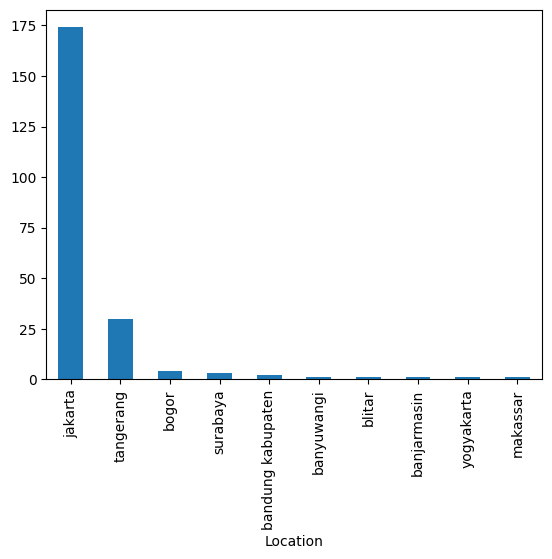

In [ ]:
df['Location'].value_counts().head(10).plot.bar()

Dari data diatas menunjukan masih terdapat data yang belum bersih dimana nama kota masih menujukan data yang tidak valid dan dari data 10 besar yang tampilkan hanya terdapat 2 kota yang muncul yaitu Jakarta dan Tangerang. Untuk itu saya akan bersihkan menjadi nama kota seutuhnya

<AxesSubplot:xlabel='Location'>

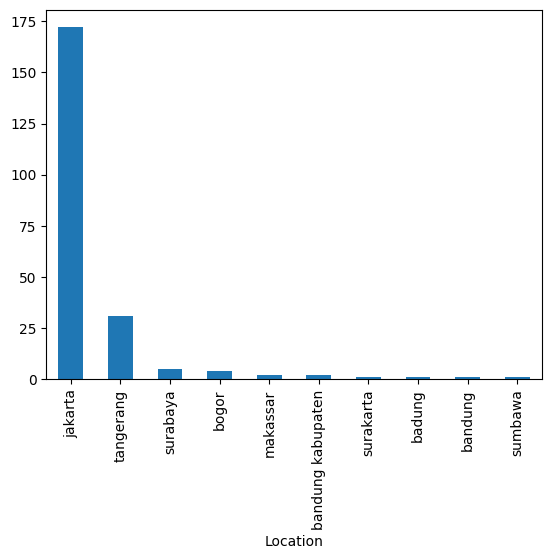

In [44]:
import string

# Buat daftar kata-kata kunci
key_words = {'jakarta': ['jakarta', 'jk'],
             'barat': ['barat', 'west'],
             'utara': ['utara', 'north'],
             'selatan': ['selatan', 'south', 'south jakarta'],
             'timur': ['timur', 'east'],
             'pusat': ['pusat', 'central'],
             'tanggerang': ['tanggerang']
             }

# Fungsi untuk mengubah nilai
def change_value(text):
    # Lakukan text preprocessing
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(text.split())
    
    # Pisahkan menjadi kata-kata
    words = text.split()
    
    # Hapus kata-kata 'pusat', 'selatan', 'timur', 'barat', 'utara' yang ada di depan kota
    keywords = ['pusat', 'selatan', 'timur', 'barat', 'utara']
    new_words = []
    for i, word in enumerate(words):
        if word not in keywords and i == 0:
            new_words.append(word)
        elif word in keywords and words[i-1] not in keywords:
            continue
        else:
            new_words.append(word)

    # Hapus kata 'kota'
    words = [word for word in words if word != 'kota']
    # Ganti kata-kata yang ada di dalam daftar kata-kata kunci
    for i, word in enumerate(words):
        for key, values in key_words.items():
            if word in values:
                words[i] = key
                break
    # Hapus kata 'city'
    words = [word for word in words if word != 'city']
    # Ganti kata-kata yang ada di dalam daftar kata-kata kunci
    for i, word in enumerate(words):
        for key, values in key_words.items():
            if word in values:
                words[i] = key
                break

    
    
    # Ganti kata-kata yang ada di dalam daftar kata-kata kunci
    for i, word in enumerate(new_words):
        for key, values in key_words.items():
            if word in values:
                new_words[i] = key
                break
                
    # Gabungkan kembali kata-kata menjadi sebuah string
    new_text = ' '.join(words)
    
    return new_text

# Ubah nilai pada kolom tertentu
df['Location'] = df['Location'].replace(['Central Jakarta','South Jakarta','East Jakarta', 'West Jakarta', 'North Jakarta'], \
                                        ['Jakarta Pusat','Jakarta Selatan','Jakarta Timur', 'Jakarta Barat', 'Jakarta Utara'])
df['Location'] = df['Location'].apply(change_value)

# Ubah nilai kolom 'Location' menjadi 'tanggerang' jika nilainya terdapat pada kota_ubah
kota_ubah = df[df['Location'].str.contains('tangerang', case=False)]
replace_dict = {k: 'tangerang' for k in kota_ubah['Location'].unique()}
df['Location'] = df['Location'].replace(replace_dict)

# Tampilkan hasil
df['Location'].value_counts().head(10).plot.bar()

Bedasarkan data yang ditampilkan maka urutan Lowongan pekerjaan untuk "Data" bedasarkan lokasi yang ditampilkan adalah :

1. Jakarta Selatan
2. Jakarta Pusat
3. Tanggerang
4. Jakarta
5. Jakarta Barat
6. Jakarta Utara
7. Jakarta Timur
8. Surabaya
9. Makati Philippines
10. Quezon City Philippines

Namun untuk melihat perbandingan jika Kota Jakarta dijadikan satu adalah :

<AxesSubplot:xlabel='Location'>

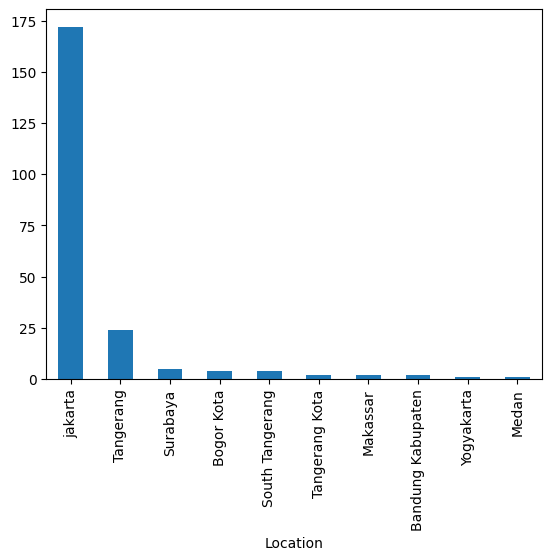

In [42]:
kota_ubah = df[df['Location'].str.contains('jakarta', case=False)]

# Ubah nilai kolom 'Location' menjadi 'jakarta' jika nilainya terdapat pada kota_ubah
replace_dict = {k: 'jakarta' for k in kota_ubah['Location'].unique()}
df['Location'] = df['Location'].replace(replace_dict)



df['Location'].value_counts().head(10).plot.bar()

Terlihat dari Diagram yang ditampilkan kalau Kota Jakarta masih merupakan Lokasi yang tinggi untuk mencari pekerjaan. Namun perlu diperhatikan data ini hanya terdiri dari 148 yang diambil dari www.kalibrr.id untuk lowongan bedasarkan kata kunci "Data" dan tidak mewakili dari seluruh indonesia. Untuk Perusahaan yang sering melakukan Posting lowongan perkerjaan bedasarkan kata kunci tersebut adalah sebagai berikut :

<AxesSubplot:xlabel='Company'>

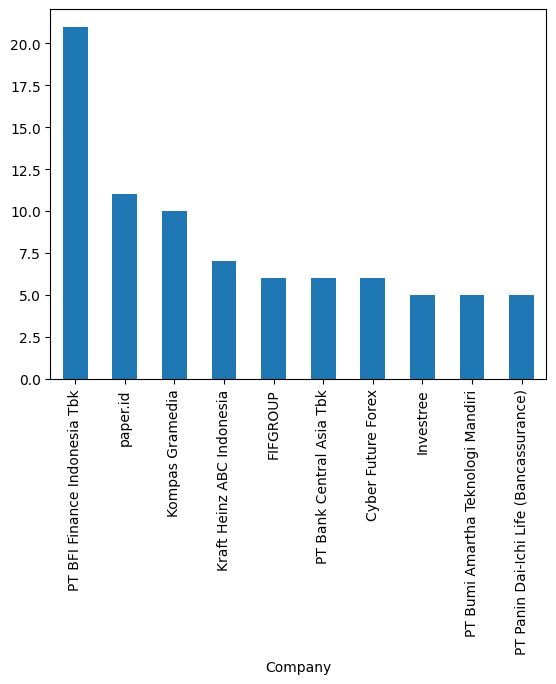

In [28]:
df['Company'].value_counts().head(10).plot.bar()

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 206
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      148 non-null    object
 1   Title        148 non-null    object
 2   Location     148 non-null    object
 3   Posted_Date  148 non-null    object
 4   Apply_Date   148 non-null    object
dtypes: object(5)
memory usage: 6.9+ KB
